In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
new_credit_df=pd.read_csv("german_credit.csv")
new_credit_df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
new_credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [4]:
new_credit_df.shape

(1000, 21)

In [5]:
new_credit_df.describe(include=[np.number])


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
new_credit_df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [7]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [8]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(new_credit_df,test_size=0.5,random_state=42)

In [9]:
print(test_data.shape)
print(train_data.shape)

(500, 21)
(500, 21)


# Or we can randomly select the data as shown below

In [10]:
credit_df=new_credit_df.sample(frac=.5,random_state=1)


In [11]:
credit_df.shape

(500, 21)

# Here we can see the original Dataset has been split into 50% with random data from the dataset credit_df

In [12]:
credit_df.shape

(500, 21)

In [13]:
credit_df.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
507,1,0 <= ... < 200 DM,15,all credits at this bank paid back duly,car (new),6850,100 <= ... < 500 DM,unemployed,1,male : single,...,2,if not A121 : building society savings agreeme...,34,none,own,1,management/ self-employed/ highly qualified em...,2,"yes, registered under the customers name",yes
818,0,< 0 DM,36,existing credits paid back duly till now,furniture/equipment,15857,... < 100 DM,unemployed,2,male : divorced/separated,...,3,"if not A121/A122 : car or other, not in attrib...",43,none,own,1,management/ self-employed/ highly qualified em...,1,none,yes
452,0,no checking account,12,no credits taken/ all credits paid back duly,radio/television,2759,... < 100 DM,.. >= 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,34,none,own,2,skilled employee / official,1,none,yes
368,1,< 0 DM,36,existing credits paid back duly till now,radio/television,3446,... < 100 DM,.. >= 7 years,4,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",42,none,own,1,skilled employee / official,2,none,yes
242,1,< 0 DM,48,no credits taken/ all credits paid back duly,car (used),4605,... < 100 DM,.. >= 7 years,3,male : single,...,4,unknown / no property,24,none,for free,2,skilled employee / official,2,none,yes


In [14]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [15]:
dummy_data = pd.get_dummies(train_data)

In [16]:
dummy_data.shape

(500, 62)

# As we using dummy have 62 columns , this makes understanding the data very complex, instead we will code the Independent variables into integers as shown below and retain 21 columns as the original dataset

In [17]:
for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df[feature] = pd.Categorical(credit_df[feature]).codes # Replace strings with an integer

In [18]:
# Print Shape of model data
credit_df.shape

(500, 21)

### Check for highly correlated variables but don't required any treatment for this use case

In [19]:
credit_df.corr()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
default,1.000000,-0.294487,0.274729,0.060430,-0.086909,0.209066,-0.134534,0.067787,0.014660,-0.076176,...,0.009692,0.081690,-0.044395,-0.054159,-0.030872,-0.042880,-0.078347,-0.008988,-0.004295,0.094948
account_check_status,-0.294487,1.000000,-0.081245,-0.076958,0.039658,-0.116052,0.110159,-0.078524,0.056164,-0.034408,...,-0.026435,-0.028463,0.090204,0.043740,-0.012952,0.031075,-0.066639,0.034786,0.021235,0.024687
duration_in_month,0.274729,-0.081245,1.000000,0.075008,-0.094375,0.628854,0.084194,0.043053,0.029655,0.088890,...,0.073515,0.044287,-0.017726,-0.013887,-0.112747,0.053460,-0.194697,0.006393,0.145770,0.150361
credit_history,0.060430,-0.076958,0.075008,1.000000,-0.010207,0.070686,0.047746,0.024029,-0.069303,-0.022803,...,-0.052423,-0.035143,-0.146290,0.036964,0.081153,-0.375984,0.012110,-0.072115,-0.048680,0.025482
purpose,-0.086909,0.039658,-0.094375,-0.010207,1.000000,-0.045574,0.020486,0.011191,0.000645,-0.060161,...,-0.006833,-0.108613,-0.107610,0.104983,0.102131,-0.084721,0.018752,-0.124252,-0.098631,0.042083
credit_amount,0.209066,-0.116052,0.628854,0.070686,-0.045574,1.000000,0.062178,0.119330,-0.329122,0.091325,...,0.019531,0.065655,0.002779,-0.033546,-0.069050,0.064565,-0.220311,0.017159,0.235923,0.036255
savings,-0.134534,0.110159,0.084194,0.047746,0.020486,0.062178,1.000000,-0.050506,0.008843,0.047798,...,0.055079,-0.078925,0.032222,-0.007646,-0.007373,-0.091568,-0.073711,0.021784,0.070216,-0.022969
present_emp_since,0.067787,-0.078524,0.043053,0.024029,0.011191,0.119330,-0.050506,1.000000,-0.127663,-0.090662,...,-0.234572,-0.053563,-0.285289,0.097790,0.094255,-0.039602,0.041964,-0.068641,-0.038376,0.016855
installment_as_income_perc,0.014660,0.056164,0.029655,-0.069303,0.000645,-0.329122,0.008843,-0.127663,1.000000,0.116774,...,0.071117,-0.010399,0.080264,0.060629,-0.140426,0.024295,-0.103368,-0.060136,0.035454,0.144436
personal_status_sex,-0.076176,-0.034408,0.088890,-0.022803,-0.060161,0.091325,0.047798,-0.090662,0.116774,1.000000,...,0.040173,0.006105,0.190109,0.066587,-0.251691,0.117670,0.020841,0.251439,0.030319,-0.058457


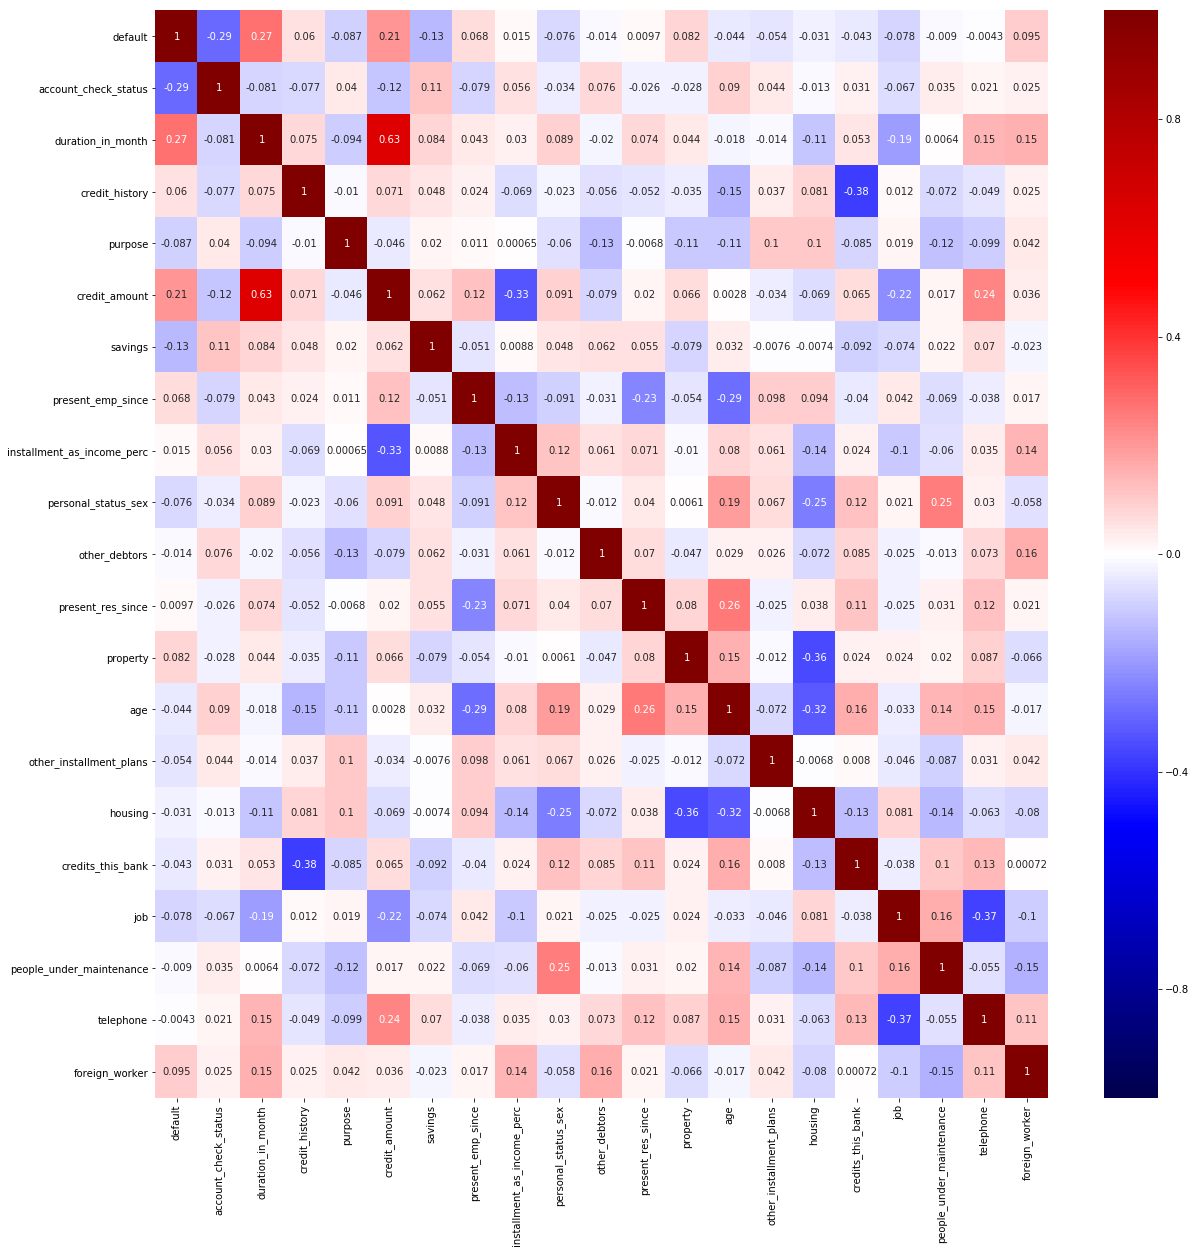

In [20]:
import seaborn as sns
plt.subplots(figsize=(20,20))
sns.heatmap(credit_df.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

### Drop the original variables which are converted to dummy

# As no dummies were created as a result of codifying we do not need to drop any variables

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [21]:
X=credit_df.drop(['default'], axis=1)
y=credit_df['default']

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [22]:
print("Test set : ", X_test.shape)
print("Training set : ", X_train.shape)
print("We can see the test and the training sent are split in 70:30 ratio")

Test set :  (150, 20)
Training set :  (350, 20)
We can see the test and the training sent are split in 70:30 ratio


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [23]:
from sklearn.ensemble import RandomForestClassifier 
Classifier=RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
#using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [24]:
Classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [25]:
y_pred=Classifier.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [26]:
from sklearn import metrics
print(Classifier.score(X_test,y_test))


0.7666666666666667


In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7666666666666667


In [60]:
print(metrics.confusion_matrix(y_test, y_pred))

[[98  8]
 [27 17]]


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.92      0.85       106
          1       0.68      0.39      0.49        44

avg / total       0.75      0.77      0.74       150



### Q6 Show the list of the features importance( 1 Marks)

In [62]:
importance=dict(zip(X_train.columns,Classifier.feature_importances_))
importance

{'account_check_status': 0.10788449594645595,
 'duration_in_month': 0.11111845075691279,
 'credit_history': 0.04667394311770695,
 'purpose': 0.06403495990879685,
 'credit_amount': 0.1331807817496371,
 'savings': 0.04822865484722865,
 'present_emp_since': 0.05392405724227517,
 'installment_as_income_perc': 0.03629377290178104,
 'personal_status_sex': 0.037676808509760365,
 'other_debtors': 0.011908140509369851,
 'present_res_since': 0.04049246895118278,
 'property': 0.05168231070026837,
 'age': 0.10619489328257321,
 'other_installment_plans': 0.026339492521305935,
 'housing': 0.03193063421475407,
 'credits_this_bank': 0.021610204878129664,
 'job': 0.03141212789843749,
 'people_under_maintenance': 0.013517916154559833,
 'telephone': 0.020769471632542714,
 'foreign_worker': 0.005126414276321146}

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [64]:
# Use below values
num_folds = 10
seed = 77

In [65]:
#Validate the Random Forest model build above using k fold

In [66]:
kfold=KFold(n_splits=num_folds, random_state=seed,shuffle=True)
result=cross_val_score(Classifier,X, y, cv=kfold)

In [67]:
#Calculate Mean score

In [68]:
result.mean()

0.758

In [69]:
# Calculate score standard deviation using std()

In [70]:
result.std()

0.0589576118919347

In [71]:
from sklearn.model_selection import cross_val_predict

y_pred_Kfold=cross_val_predict(Classifier,X, y, cv=kfold)

# Q8 Print the confusion matrix( 1 Marks)

In [82]:
y.shape

(500,)

In [73]:
y_pred_Kfold.shape

(500,)

In [74]:
print(metrics.confusion_matrix(y, y_pred_Kfold))

[[328  28]
 [ 93  51]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [75]:
print(classification_report(y, y_pred_Kfold))

             precision    recall  f1-score   support

          0       0.78      0.92      0.84       356
          1       0.65      0.35      0.46       144

avg / total       0.74      0.76      0.73       500



In [76]:
from sklearn.metrics import recall_score, precision_score
print('Recall Rate for k cross fold',recall_score(y,y_pred_Kfold))
print('Recall Rate for Original',recall_score(y_test,y_pred))

Recall Rate for k cross fold 0.3541666666666667
Recall Rate for Original 0.38636363636363635


In [77]:
print('Precison Rate k cross fold',precision_score(y,y_pred_Kfold))
print("Precison Rate for original",precision_score(y_test, y_pred))

Precison Rate k cross fold 0.6455696202531646
Precison Rate for original 0.68


# I am getting a Higher Recall and Precision for Random Forest Model and Lower Recall and Precision  when using Kfold Cross Validation

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [78]:
#Hint: Use roc_curve

In [79]:
from sklearn.metrics import roc_curve

In [80]:
credit_df["prob"] = Classifier.predict(X)

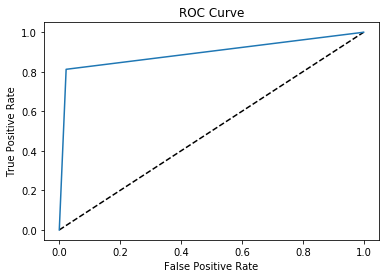

0.7900280898876404

In [81]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y,credit_df["prob"] )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

KS = (tpr - fpr).max()
KS

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [50]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y,credit_df["prob"])
auc

0.8950140449438202

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [51]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []